In [1]:
import pandas as pd

df = pd.read_parquet("Codigos/pns_2019.parquet")
df.head()

ImportError: Unable to find a usable engine; tried using: 'pyarrow', 'fastparquet'.
A suitable version of pyarrow or fastparquet is required for parquet support.
Trying to import the above resulted in these errors:
 - Missing optional dependency 'pyarrow'. pyarrow is required for parquet support. Use pip or conda to install pyarrow.
 - Missing optional dependency 'fastparquet'. fastparquet is required for parquet support. Use pip or conda to install fastparquet.

In [ ]:
df_hipertensao = df[df['Q00201'] == '1']
df_hipertensao

,V0001,V0024,UPA_PNS,V0006_PNS,V0015,V0020,V0022,V0026,V0031,V0025A,...,VDE002,VDE014,VDF002,VDF003,VDF004,VDL001,VDM001,VDP001,VDR001,VDDATA
0,11,1110011,110000016,1,1,2019,6,1,1,1,...,1,6,2098,350,2,NA,NA,NA,NA,20210825
21,11,1110011,110000016,6,1,2019,1,1,1,1,...,NA,NA,998,998,3,NA,NA,NA,NA,20210825
31,11,1110011,110000016,10,1,2019,1,1,1,1,...,NA,NA,1398,1398,4,NA,NA,NA,NA,20210825
91,11,1110011,110000153,7,1,2019,3,1,1,1,...,1,8,2198,733,3,NA,3,NA,NA,20210825
103,11,1110011,110000153,11,1,2019,11,1,1,1,...,NA,NA,3996,363,2,NA,NA,NA,NA,20210825
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
293547,53,5310220,530029800,9,1,2019,4,2,1,1,...,NA,NA,2166,542,3,NA,NA,NA,6,20210825
293591,53,5310220,530037924,9,1,2019,4,2,1,1,...,1,1,460,115,1,NA,2,1,6,20210825
293621,53,5310220,530038867,4,1,2019,1,2,1,1,...,1,11,998,998,3,NA,NA,NA,NA,20210825
293649,53,5310220,530038867,15,1,2019,2,2,1,1,...,1,4,5200,2600,5,NA,1,NA,NA,20210825


In [ ]:
# Converter a coluna Q003 para numérica (int), transformando erros em NaN
df_hipertensao["Q003"] = pd.to_numeric(df_hipertensao["Q003"], errors='coerce')

# Agora você pode filtrar normalmente
df_novos = df_hipertensao[df_hipertensao["Q003"] <= 47]

/tmp/ipython-input-2620706587.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_hipertensao["Q003"] = pd.to_numeric(df_hipertensao["Q003"], errors='coerce')


In [ ]:
df_novos = df_hipertensao[df_hipertensao['Q003'] <= 47]
df_novos

,V0001,V0024,UPA_PNS,V0006_PNS,V0015,V0020,V0022,V0026,V0031,V0025A,...,VDE002,VDE014,VDF002,VDF003,VDF004,VDL001,VDM001,VDP001,VDR001,VDDATA
0,11,1110011,110000016,1,1,2019,6,1,1,1,...,1,6,2098,350,2,NA,NA,NA,NA,20210825
181,11,1110011,110000584,12,1,2019,3,1,1,1,...,NA,NA,2994,998,3,NA,NA,1,NA,20210825
217,11,1110011,110001520,11,1,2019,1,1,1,1,...,1,7,3500,3500,6,NA,2,NA,NA,20210825
219,11,1110011,110001520,12,1,2019,3,1,1,1,...,NA,NA,2800,933,3,NA,NA,NA,NA,20210825
243,11,1110011,110002149,6,1,2019,4,1,1,1,...,2,NA,1996,499,2,NA,NA,NA,1,20210825
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
293535,53,5310220,530029800,4,1,2019,3,2,1,1,...,1,6,3000,1000,4,NA,1,NA,NA,20210825
293547,53,5310220,530029800,9,1,2019,4,2,1,1,...,NA,NA,2166,542,3,NA,NA,NA,6,20210825
293591,53,5310220,530037924,9,1,2019,4,2,1,1,...,1,1,460,115,1,NA,2,1,6,20210825
293649,53,5310220,530038867,15,1,2019,2,2,1,1,...,1,4,5200,2600,5,NA,1,NA,NA,20210825


In [ ]:
# Dicionário de códigos de estado (IBGE) para nomes
mapa_estados = {
    11: "RO",  # Rondônia
    12: "AC",  # Acre
    13: "AM",  # Amazonas
    14: "RR",  # Roraima
    15: "PA",  # Pará
    16: "AP",  # Amapá
    17: "TO",  # Tocantins
    21: "MA",  # Maranhão
    22: "PI",  # Piauí
    23: "CE",  # Ceará
    24: "RN",  # Rio Grande do Norte
    25: "PB",  # Paraíba
    26: "PE",  # Pernambuco
    27: "AL",  # Alagoas
    28: "SE",  # Sergipe
    29: "BA",  # Bahia
    31: "MG",  # Minas Gerais
    32: "ES",  # Espírito Santo
    33: "RJ",  # Rio de Janeiro
    35: "SP",  # São Paulo
    41: "PR",  # Paraná
    42: "SC",  # Santa Catarina
    43: "RS",  # Rio Grande do Sul
    50: "MS",  # Mato Grosso do Sul
    51: "MT",  # Mato Grosso
    52: "GO",  # Goiás
    53: "DF"   # Distrito Federal
}

# Criar nova coluna com nomes dos estados
df_novos["Estado"] = df_novos["V0001"].map(mapa_estados)


/tmp/ipython-input-2956174854.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_novos["Estado"] = df_novos["V0001"].map(mapa_estados)


In [ ]:
populacao_estados = {
    "RO": 1746227,
    "AC": 880631,
    "AM": 4281209,
    "RR": 716793,
    "PA": 8664306,
    "AP": 802837,
    "TO": 1577342,
    "MA": 7010960,
    "PI": 3375646,
    "CE": 9233656,
    "RN": 3446071,
    "PB": 4145040,
    "PE": 9539029,
    "AL": 3220104,
    "SE": 2291077,
    "BA": 14850513,
    "MG": 21322691,
    "ES": 4102129,
    "RJ": 17219679,
    "SP": 45973194,
    "PR": 11824665,
    "SC": 8058441,
    "RS": 11229915,
    "MS": 2901895,
    "MT": 3836399,
    "GO": 7350483,
    "DF": 2982818
}

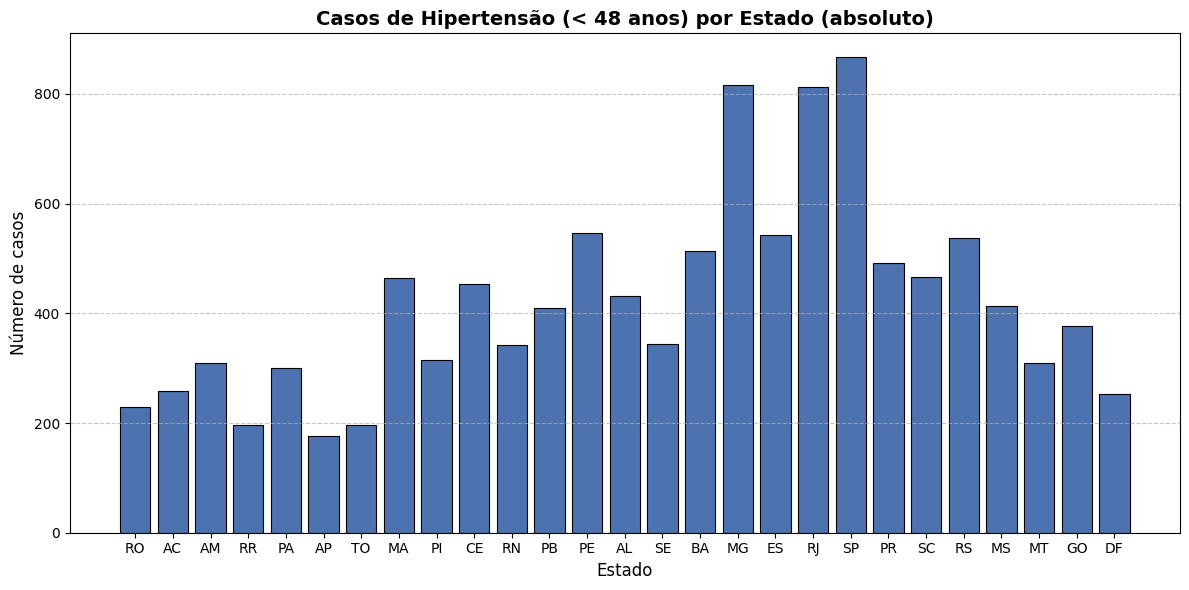

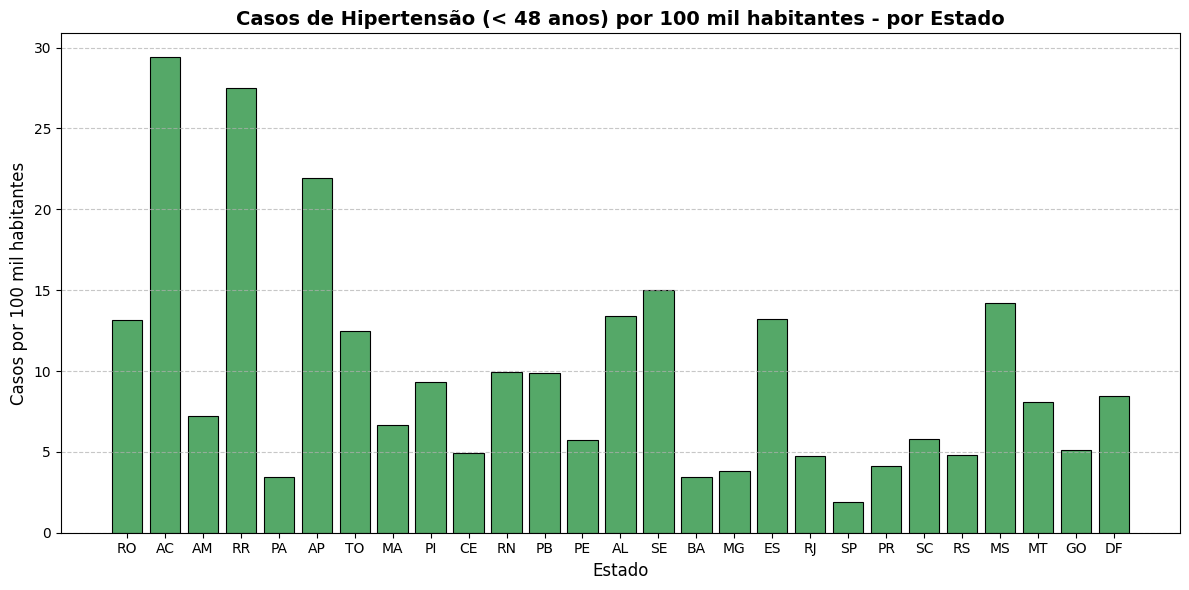

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Agrupar os dados: contar casos e pegar o código do IBGE por estado
df_casos = df_novos.groupby("Estado").agg({
    "Estado": "count",
    "V0001": "first"  # ou "min", se tiver vários valores por estado e forem iguais
}).rename(columns={"Estado": "Casos"})

# Adicionar população
df_casos["Populacao"] = df_casos.index.map(populacao_estados)

# Calcular casos por 100 mil habitantes
df_casos["Casos_per_100k"] = (df_casos["Casos"] / df_casos["Populacao"]) * 100000

# Ordenar pelo código do IBGE (V0001)
df_casos = df_casos.sort_values("V0001")

# ----------------- GRÁFICO 1: Casos absolutos -----------------
plt.figure(figsize=(12,6))
plt.bar(df_casos.index, df_casos["Casos"], color="#4C72B0", edgecolor="black", linewidth=0.8)
plt.title("Casos de Hipertensão (< 48 anos) por Estado (absoluto)", fontsize=14, fontweight='bold')
plt.xlabel("Estado", fontsize=12)
plt.ylabel("Número de casos", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# ----------------- GRÁFICO 2: Casos per capita -----------------
plt.figure(figsize=(12,6))
plt.bar(df_casos.index, df_casos["Casos_per_100k"], color="#55A868", edgecolor="black", linewidth=0.8)
plt.title("Casos de Hipertensão (< 48 anos) por 100 mil habitantes - por Estado", fontsize=14, fontweight='bold')
plt.xlabel("Estado", fontsize=12)
plt.ylabel("Casos por 100 mil habitantes", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [ ]:
estado_para_regiao = {
    # Norte
    "AC": "Norte", "AP": "Norte", "AM": "Norte", "PA": "Norte",
    "RO": "Norte", "RR": "Norte", "TO": "Norte",

    # Nordeste
    "AL": "Nordeste", "BA": "Nordeste", "CE": "Nordeste", "MA": "Nordeste",
    "PB": "Nordeste", "PE": "Nordeste", "PI": "Nordeste", "RN": "Nordeste",
    "SE": "Nordeste",

    # Sudeste
    "ES": "Sudeste", "MG": "Sudeste", "RJ": "Sudeste", "SP": "Sudeste",

    # Sul
    "PR": "Sul", "RS": "Sul", "SC": "Sul",

    # Centro-Oeste
    "DF": "Centro-Oeste", "GO": "Centro-Oeste", "MT": "Centro-Oeste", "MS": "Centro-Oeste"
}

df_novos["Regiao"] = df_novos["Estado"].map(estado_para_regiao)

/tmp/ipython-input-206101209.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_novos["Regiao"] = df_novos["Estado"].map(estado_para_regiao)


In [ ]:
from collections import defaultdict

# Inicializa contagem de população por região
populacao_regioes = defaultdict(int)

# Atribui cada estado à sua região e soma suas populações
for uf, pop in populacao_estados.items():
    regiao = estado_para_regiao.get(uf)
    if regiao:
        populacao_regioes[regiao] += pop

# Converter para dict normal (opcional)
populacao_regioes = dict(populacao_regioes)


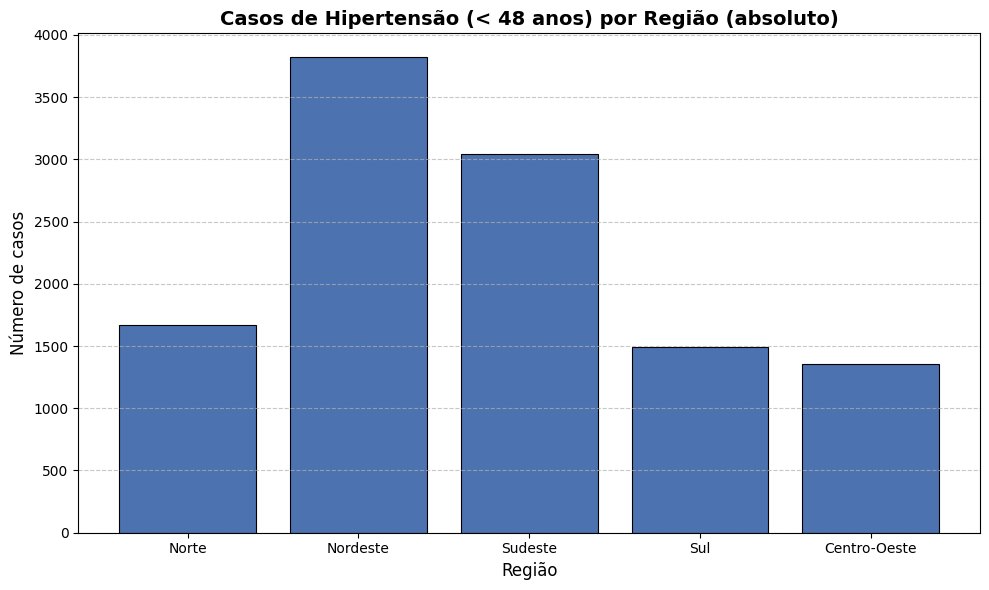

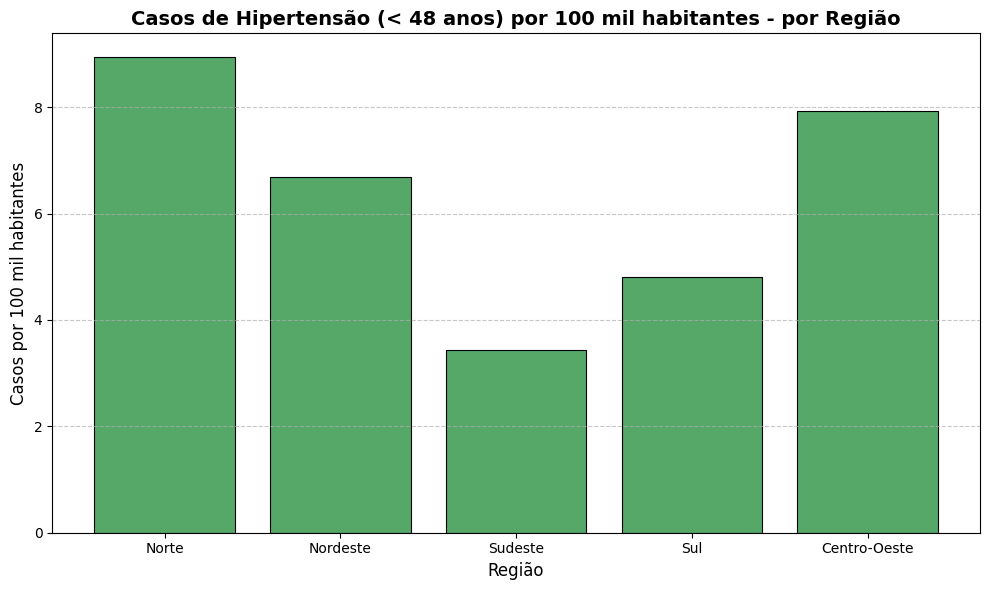

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Agrupar os dados: contar casos e pegar o código do IBGE por região
df_casos = df_novos.groupby("Regiao").agg({
    "Regiao": "count",
    "V0001": "first"  # ou "min", se tiver vários valores por região e forem iguais
}).rename(columns={"Regiao": "Casos"})

# Adicionar população
df_casos["Populacao"] = df_casos.index.map(populacao_regioes)

# Calcular casos por 100 mil habitantes
df_casos["Casos_per_100k"] = (df_casos["Casos"] / df_casos["Populacao"]) * 100000

# Ordenar pelo código do IBGE (V0001)
df_casos = df_casos.sort_values("V0001")

# ----------------- GRÁFICO 1: Casos absolutos -----------------
plt.figure(figsize=(10,6))
plt.bar(df_casos.index, df_casos["Casos"], color="#4C72B0", edgecolor="black", linewidth=0.8)
plt.title("Casos de Hipertensão (< 48 anos) por Região (absoluto)", fontsize=14, fontweight='bold')
plt.xlabel("Região", fontsize=12)
plt.ylabel("Número de casos", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# ----------------- GRÁFICO 2: Casos per capita -----------------
plt.figure(figsize=(10,6))
plt.bar(df_casos.index, df_casos["Casos_per_100k"], color="#55A868", edgecolor="black", linewidth=0.8)
plt.title("Casos de Hipertensão (< 48 anos) por 100 mil habitantes - por Região", fontsize=14, fontweight='bold')
plt.xlabel("Região", fontsize=12)
plt.ylabel("Casos por 100 mil habitantes", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
